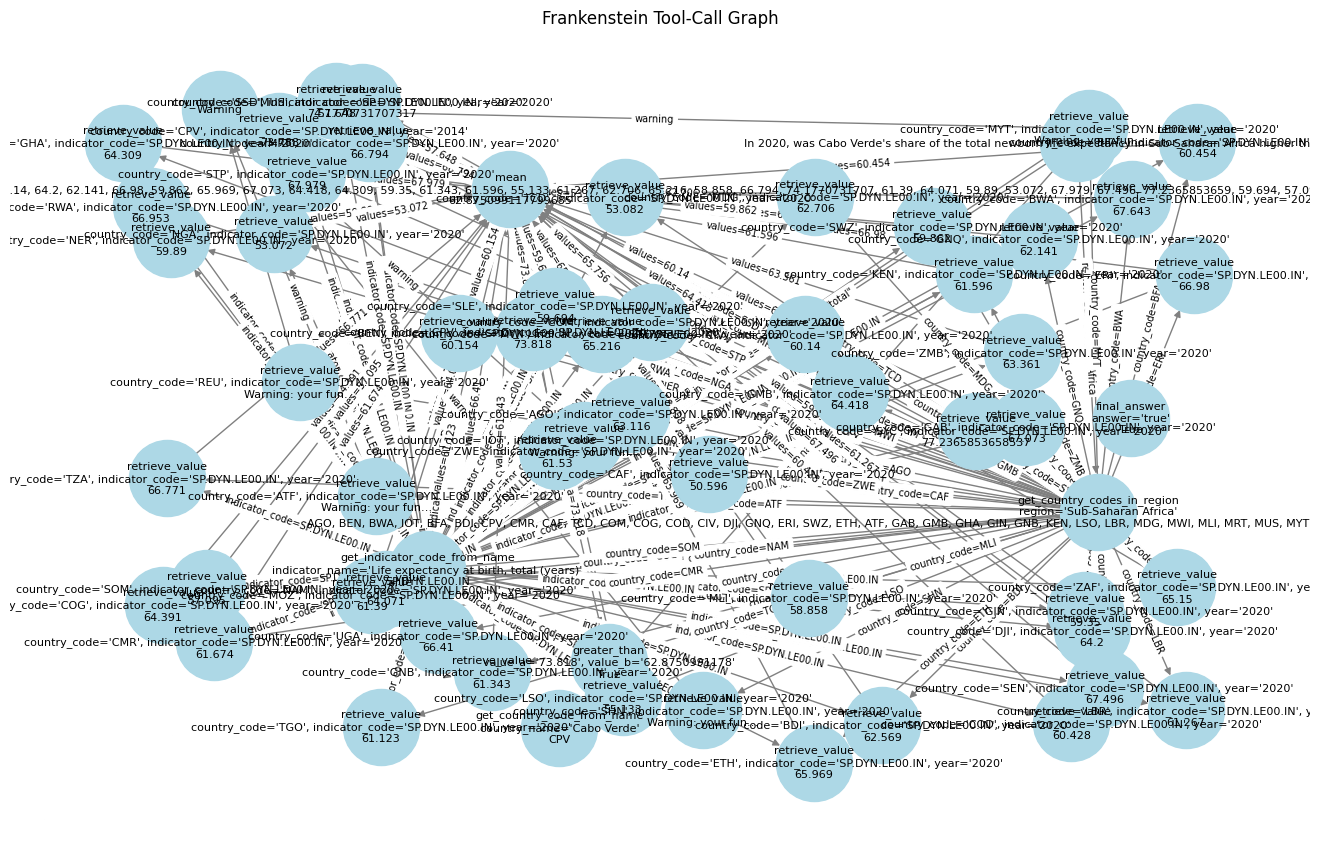

In [3]:
import logging
import os
import sys

import networkx as nx
import pandas as pd

# In Jupyter, __file__ is not defined, so use the current working directory
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '..')))
from frankenstein.graph import FrankensteinGraph

# Suppress all logging from FrankensteinGraph and its dependencies
logging.getLogger().setLevel(logging.ERROR)

df = pd.read_json('../eval/runs/gpt-4o-mini_answerable-full.jsonl', orient='records', lines=True)

G = FrankensteinGraph(df.iloc[3])
# G.draw_pretty()
G.draw('shell')

In [2]:
for node_id, attrs in G.nodes(data=True):
    print(f'Node ID: {node_id}')
    print(f'  Label: {attrs.get("label")}')
    print(f'  Arguments: {attrs.get("args")}')
    print(f'  Result: {attrs.get("result")}')


Node ID: question_root
  Label: In 2011, was Australia's births per woman higher than the average value for Western Europe?
  Arguments: None
  Result: None
Node ID: call_NqEFIL05K0hwPUMMzTqeD5ri
  Label: get_country_code_from_name
  Arguments: {'country_name': 'Australia'}
  Result: AUS
Node ID: call_Rkt25ERQM2IHEqIuFSachjvd
  Label: search_for_indicator_codes
  Arguments: {'keywords': ['births per woman']}
  Result: [{'indicator_code': 'SP.DYN.TFRT.IN', 'indicator_name': 'Fertility rate, total (births per woman)'}]
Node ID: call_rET9a10vrXcHhCUrlIZRRngf
  Label: retrieve_value
  Arguments: {'country_code': 'AUS', 'indicator_code': 'SP.DYN.TFRT.IN', 'year': '2011'}
  Result: 1.926
Node ID: call_q6gdS517fCHyVwIUq3xdz9Qp
  Label: retrieve_value
  Arguments: {'country_code': 'WES', 'indicator_code': 'SP.DYN.TFRT.IN', 'year': '2011'}
  Result: Error: country code 'WES' is not valid. Ensure you have used the 'get_country_code_from_name' function to get the code from the country name.
Node 

In [3]:
def nodes_not_on_path(
    graph: FrankensteinGraph,
) -> list:
    """Return a list of nodes that are not on any path from the start node to the end node."""
    nodes = graph.nodes(data=True)

    end_node = next(n for n, attrs in nodes if attrs.get('label') == 'final_answer')

    unused_nodes = []
    for node_id, attrs in nodes:
        if not nx.has_path(graph, node_id, end_node):
            unused_nodes.append(node_id)

    return unused_nodes


# Example usage
unused_nodes = nodes_not_on_path(G)
for node_id in unused_nodes:
    print(f'Unused Node ID: {node_id}')
    attrs = G.nodes[node_id]
    print(f'  Label: {attrs.get("label")}')
    print(f'  Arguments: {attrs.get("args")}')
    print(f'  Result: {attrs.get("result")}')

Unused Node ID: question_root
  Label: In 2011, was Australia's births per woman higher than the average value for Western Europe?
  Arguments: None
  Result: None
Unused Node ID: call_NqEFIL05K0hwPUMMzTqeD5ri
  Label: get_country_code_from_name
  Arguments: {'country_name': 'Australia'}
  Result: AUS
Unused Node ID: call_Rkt25ERQM2IHEqIuFSachjvd
  Label: search_for_indicator_codes
  Arguments: {'keywords': ['births per woman']}
  Result: [{'indicator_code': 'SP.DYN.TFRT.IN', 'indicator_name': 'Fertility rate, total (births per woman)'}]
Unused Node ID: call_rET9a10vrXcHhCUrlIZRRngf
  Label: retrieve_value
  Arguments: {'country_code': 'AUS', 'indicator_code': 'SP.DYN.TFRT.IN', 'year': '2011'}
  Result: 1.926
Unused Node ID: call_q6gdS517fCHyVwIUq3xdz9Qp
  Label: retrieve_value
  Arguments: {'country_code': 'WES', 'indicator_code': 'SP.DYN.TFRT.IN', 'year': '2011'}
  Result: Error: country code 'WES' is not valid. Ensure you have used the 'get_country_code_from_name' function to get th